In [1]:
import nease
import pandas as pd

### Input of NEASE

In [2]:
# MAJIQ output from diff splicing analysis
table=pd.read_table('AS data/RP_MP.deltapsi.tsv')
table.head(10)

,Gene ID,LSV ID,LSV Type,E(dPSI) per LSV junction,P(|dPSI|>=0.20) per LSV junction,P(|dPSI|<=0.05) per LSV junction,RP E(PSI),MP E(PSI),A5SS,A3SS,ES,Num. Junctions,Num. Exons,Junctions coords,IR coords
0,gene:ENSG00000114541,gene:ENSG00000114541:s:69216263-69216349,s|1e1.1o1|1e2.1o1,-0.005782585546726535;0.005782614800287916,9.131576598358074e-08;9.137648207446503e-08,0.0014495511204322131;0.0014494803303662547,0.129;0.871,0.118;0.882,False,False,True,2,3,69203663-69216263;69198774-69216263,NaN
1,gene:ENSG00000013016,gene:ENSG00000013016:t:31249371-31249468,t|1e1.1o1|1e2.1o1,-1.0409200397050978e-06;1.0409449796065466e-06,2.161478452922632e-17;5.7633005667787e-21,0.33219023968248607;0.38387259150734654,0.989;0.011,0.997;0.003,False,False,True,2,3,31244450-31249371;31247600-31249371,NaN
2,gene:ENSG00000163249,gene:ENSG00000163249:t:207737411-207737446,t|1e1.1o1|1e2.1o1,-0.006480923483079155;0.006480959095261932,7.146387919964888e-21;1.1103874466436185e-16,0.007480946095522967;0.0074801906689989,0.077;0.923,0.057;0.943,False,False,True,2,3,207726876-207737411;207734047-207737411,NaN
3,gene:ENSG00000175768,gene:ENSG00000175768:s:37592253-37592604,s|1e1.1o1|2e1.1o1|3e1.1o1|4e1.1o1,5.0463835495277774e-05;-5.904803237012686e-05;1.652412460086734e-05;4.883323744520894e-08,3.4130326357216425e-15;5.778230516273508e-21;5.7668534394596114e-21;5.763076690348758e-21,0.3922110608923171;0.47500375739463974;0.3126653507651424;0.4795173035424664,0.974;0.024;0.001;0.001,0.986;0.001;0.011;0.001,True,False,False,4,2,37588932-37592412;37588932-37592310;37588932-37592291;37588932-37592253,NaN
4,gene:ENSG00000171314,gene:ENSG00000171314:s:97426191-97426446,s|1e1.1o1|1e2.1o1,4.724984506503472e-08;-4.723727326833177e-08,5.763080448213274e-21;5.7630784096046076e-21,0.479667324307433;0.46310685173120447,0.000;1.000,0.002;0.998,False,False,True,2,3,97426446-97427101;97426446-97430379,NaN
5,gene:ENSG00000070081,gene:ENSG00000070081:t:17337348-17337534,t|1e1.1o2|1e2.2o2|1e3.1o1,-1.4839999072041732e-07;-0.035078352364741286;0.037720949966424555,5.763302677270467e-21;3.776108853996125e-06;5.60355759993587e-06,0.3796385258587732;0.001549123232391536;0.0013406243550228008,0.002;0.071;0.927,0.002;0.002;0.996,False,False,True,3,4,17330983-17337348;17334480-17337348;17337083-17337348,NaN
6,gene:ENSG00000156642,gene:ENSG00000156642:t:73591636-73592137,t|1e1.1o1|1e2.1o1|2e3.1o1,1.5128644572790744e-06;-2.630621068413839e-07;7.771559807339239e-16,5.763417672044591e-21;5.7631380231416315e-21;5.763072138872256e-21,0.475146975780804;0.4758444014231338;0.9999999984380891,0.970;0.028;0.001,0.986;0.012;0.002,False,True,True,3,4,73592137-73633125;73592137-73597022;73592069-73633125,NaN
7,gene:ENSG00000161911,gene:ENSG00000161911:s:41150819-41150907,s|1e1.1o1|1e2.1o1,-0.05734912848878308;0.05734912889360104,0.010621172501803064;0.010621173632136029,0.00016518971012491335;0.00016517468688905098,0.358;0.642,0.274;0.726,False,False,True,2,3,41150313-41150819;41149918-41150819,NaN
8,gene:ENSG00000124164,gene:ENSG00000124164:t:58434602-58434705,t|1e1.1o1|1e2.1o1,-0.0015125388535255117;0.0015125458359988829,9.615180636165624e-09;9.41502720231469e-09,0.012035152551162942;0.012034076718232346,0.999;0.001,0.973;0.027,False,False,True,2,3,58418363-58434602;58432416-58434602,NaN
9,gene:ENSG00000176261,gene:ENSG00000176261:t:32633951-32634110,t|1e1.1o3|1e1.3o3|1e2.1o2|1e2.2o2|2e3.2o3|2e4.1o2|2e4.2o2,-0.0035510075011086816;-0.014161488820529144;0.12375973296675297;-0.0012751712488021686;-9.313197791306263e-11;-0.022835413884216206;-0.009522066851940745,1.0530855212983533e-10;9.39968337602077e-21;0.09807546993960292;6.165729416343333e-21;5.763072128406005e-21;0.00020986762155967992;5.654678899262811e-06,0.004475544488970695;0.04599860912884557;5.588251358895945e-05;0.35853428549474475;0.9054120524728562;0.0004564742616615103;0.0011360765182913957,0.076;0.053;0.253;0.034;0.001;0.309;0.275,0.061;0.000;0.387;0.028;0.000;0.269;0.254,True,True,True,7,5,32634110-32650433;32634110-32650402;326341

### Run NEASE

In [3]:
# Run nease with standard input.
events=nease.run(table, organism='Human',input_type='MAJIQ',)

Processing MAJIQ format...
MAJIQ output converted successfully to NEASE format.

		Data Summary
**************************************************
25 protein domains are affected by AS.
17 of the affected domains have known interactions.
184 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


### Classic gene enrichment

In [4]:
# This is an enrichement at gene level: all (diff) spliced genes.
# The function use the library gseapy and need gseapy_databases parameter 
# let first check what libraries are available on gseapy for Human

import gseapy as gp
Human = gp.get_library_name(database='Human')
Human[:5]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues']

In [5]:
# Run on KEGG gene set
enr=events.classic_enrich(gseapy_databases=['Reactome_2016'])
enr.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Membrane Trafficking Homo sapiens R-HSA-199991,13/420,0.000061,0.022960,0,0,3.977068,38.598171,ARF4;ARF1;VPS37A;ANK1;BICD1;TBC1D1;MAN2A1;KIF5B;UBC;RAB3GAP2;EXOC5;AP3S1;RAB6A
1,Reactome_2016,RORA activates gene expression Homo sapiens R-HSA-1368082,4/27,0.000074,0.022960,0,0,20.877997,198.528342,NCOA1;NCOA2;TBL1XR1;NRIP1
2,Reactome_2016,Circadian Clock Homo sapiens R-HSA-400253,5/63,0.000192,0.037909,0,0,10.393713,88.945539,NCOA1;NCOA2;TBL1XR1;NRIP1;UBC
3,Reactome_2016,Vesicle-mediated transport Homo sapiens R-HSA-5653656,13/492,0.000290,0.037909,0,0,3.366736,27.418967,ARF4;ARF1;VPS37A;ANK1;BICD1;TBC1D1;MAN2A1;KIF5B;UBC;RAB3GAP2;EXOC5;AP3S1;RAB6A
4,Reactome_2016,Golgi-to-ER retrograde transport Homo sapiens R-HSA-8856688,6/110,0.000345,0.037909,0,0,6.982185,55.653094,ARF4;ARF1;KIF5B;RAB3GAP2;RAB6A;BICD1
5,Reactome_2016,"BMAL1:CLOCK,NPAS2 activates circadian gene expression Homo sapiens R-HSA-1368108",4/42,0.000429,0.037909,0,0,12.627113,97.920296,NCOA1;NCOA2;TBL1XR1;NRIP1
6,Reactome_2016,Activation of gene expression by SREBF (SREBP) Homo sapiens R-HSA-2426168,4/42,0.000429,0.037909,0,0,12.627113,97.920296,NCOA1;NCOA2;TBL1XR1;FDFT1
7,Reactome_2016,Pink/Parkin Mediated Mitophagy Homo sapiens R-HSA-5205685,3/22,0.000811,0.051703,0,0,18.844642,134.121043,UBC;ATG12;ATG5
8,Reactome_2016,Mitophagy Homo sapiens R-HSA-5205647,3/22,0.000811,0.051703,0,0,18.844642,134.121043,UBC;ATG12;ATG5
9,Reactome_2016,Intra-Golgi and retrograde Golgi-to-ER traffic Homo sapiens R-HSA-6811442,7/179,0.000835,0.051703,0,0,4.938738,35.004616,ARF4;ARF1;MAN2A1;KIF5B;RAB3GAP2;RAB6A;BICD1


### NEASE analysis


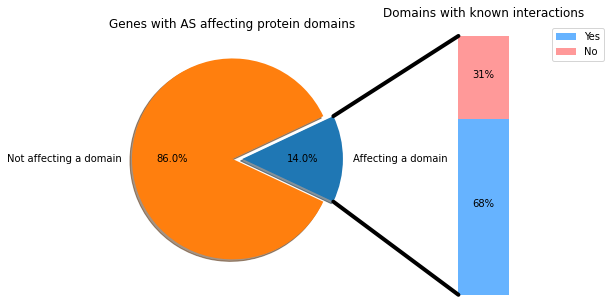

In [6]:
events.get_stats()

In [7]:
len(events.spliced_genes)

169

In [8]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

events.get_domains().head(10)

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Visualization link
0,PPM1A,5494,ENSG00000100614,ENSE00003598557,PF00481,0.577477,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003598557
1,SCFD2,152579,ENSG00000184178,ENSE00001327240,PF00995,0.545700,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001327240
2,PTPN12,5782,ENSG00000127947,ENSE00003466075,PF00102,0.539035,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003466075
3,ERLEC1,27248,ENSG00000068912,ENSE00000752711,PF07915,0.515317,False,
4,GNAQ,2776,ENSG00000156052,ENSE00001274239,PF00503,0.457661,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001274239
5,DYNC1LI1,51143,ENSG00000144635,ENSE00003565423,PF05783,0.457264,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003565423
6,MYOM1,8736,ENSG00000101605,ENSE00001240567,PF00041,0.436869,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001240567
7,GRK3,157,ENSG00000100077,ENSE00003677641,PF00615,0.434388,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003677641
8,UBE2V2,7336,ENSG00000169139,ENSE00003509614,PF00179,0.427618,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003509614
9,CBR4,84869,ENSG00000145439,ENSE00002050409,PF00106,0.417737,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00002050409


In [9]:
# List of affected interactions (domain binding)

events.get_edges().head(10)

,Gene name,NCBI gene ID,dPSI,Pfam ID,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,GNAQ,2776,0.457661,PF00503,34,"PLCB1,GNG4,S1PR2,GNB2,RGS5,GNAS,RGS7,CCR1,RGS18,GNG3,RGS2,PLCB2,MRGPRX1,ARHGEF1,UBQLN2,TBXA2R,ARHGEF12,F2R,RGS4,AKAP13,ARHGEF11,CDK19,P2RY8,GRK2,RGS16,GNB1,VIPR1,WDR36,GNB4,PTGIR,S1PR1,LINC02210,ATP4A,GNB3","23236,2786,9294,2783,8490,2778,6000,64407,1230,2785,5997,5330,259249,9138,29978,6915,23365,2149,5999,11214,9826,23097,286530,156,6004,2782,7433,134430,59345,5739,1901,1394,495,2784"
1,UBE2V2,7336,0.427618,PF00179,33,"TRAF2,UBXN1,UBE2V1,RC3H2,UBE2L3,TRIM32,XIAP,RNF8,MKRN3,STUB1,TPT1,UBE2N,RNF2,UBE2M,RFFL,UBC,TRIM21,HLTF,MUL1,UBE2B,RC3H1,TRIM5,TRIM63,SHPRH,BIRC2,ZNRF1,DZIP3,TRIM54,OTUB1,LNX1,RAD23B,RNF11,RBCK1","7186,51035,7335,54542,7332,22954,331,9025,7681,10273,7178,7334,6045,9040,117584,7316,6737,6596,79594,7320,149041,85363,84676,257218,329,84937,9666,57159,55611,84708,5887,26994,10616"
2,PTPN12,5782,0.539035,PF00102,28,"JAK2,BCAR1,LMTK2,IGF1R,GRB2,EGFR,KDR,NEDD9,PTK2B,PTPN6,ERBB4,NTRK1,ROR2,PLCG1,CSK,NCK1,FGFR2,NCK2,SHC1,FGFR4,ERBB3,PTK7,AATK,ASAP1,TNS3,PACSIN2,MAPK1,SORBS2","3717,9564,22853,3480,2885,1956,3791,4739,2185,5777,2066,4914,5335,1445,4690,4920,2263,8440,6464,2264,2065,5754,9625,50807,64759,11252,5594,8470"
3,PRKCA,5578,0.370855,PF00130,23,"PRKCB,DLG4,PLA2G4A,PRKCG,GSK3A,SMURF1,NOXA1,AFAP1,AKAP13,PLEKHA4,FGD4,NCF1,RALBP1,TIAM1,CHUK,PRKCH,WWC1,GSK3B,PLD1,PRKCA,IKBKB,MAPK7,PLCG2","5579,1742,5321,5582,2931,57154,10811,60312,11214,121512,653361,57664,10928,7074,1147,5583,23286,2932,5337,5578,3551,5598,5336"
4,RAB6A,5870,0.267053,PF00071,22,"CHM,GDI1,TGFBR2,OCRL,RAB1B,ARF1,ERC1,KRAS,NPHP1,SYTL5,RAB9A,RAB1A,PLEKHA4,RABGAP1,RAB11B,RAB2A,RAB6B,CHML,RAB7A,HRAS,RAB11A,NRAS","1121,2664,7048,4952,81876,375,23085,3845,4867,94122,9367,5861,57664,23637,9230,5862,51560,1122,7879,3265,8766,4893"
5,PPM1A,5494,0.577477,PF00481,15,"MAP4K5,AKT1,PKN1,PRKAA1,CHEK1,PRKCI,PAK4,MAPK9,PAK1,PLK3,PPM1B,PAK2,PRKCA,CDC42BPB,CDC42BPA","11183,207,5585,5562,1111,5584,10298,9578,5601,5058,1263,5062,5578,5495,8476"
6,ARF4,378,0.320421,PF00025,10,"CDK2,RAB9A,CDK9,IDH1,GRK5,ARF1,RAB11A,PLEKHA4,NRAS,ASB14","1017,9367,1025,3417,2869,375,8766,57664,4893,142686"
7,GRK3,157,0.434388,PF00615,4,"CXCR4,GRK2,CCR4,ADRB2","7852,156,1233,154"
8,SCFD2,152579,0.545700,PF00995,3,"VAMP4,SEC22B,STX12","8674,9554,23673"
9,ARHGEF12,23365,0.409407,PF17820,3,"ARHGEF12,GIPC2,GIPC1","23365,54810,10755"


### NEASE edge enrichment 

In [17]:
nease_enr=events.enrich(database=['Reactome'])
nease_enr.head(40)

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 92 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,R-HSA-388396,GPCR downstream signalling,Reactome,"PPM1A (2), PTPN12 (5), GNAQ (28), GRK3 (4), ARHGEF12 (1), PRKCA (9), ARF4 (2), RAB6A (3)",4.954698e-23,6.958304e-20,102.718242
1,R-HSA-372790,Signaling by GPCR,Reactome,"PPM1A (2), PTPN12 (5), GNAQ (28), GRK3 (4), ARHGEF12 (1), PRKCA (9), ARF4 (2), RAB6A (3)",7.671780e-23,6.958304e-20,101.843817
2,R-HSA-416476,G alpha (q) signalling events,Reactome,"PPM1A (1), PTPN12 (3), GNAQ (13), GRK3 (1), PRKCA (3), ARF4 (2), RAB6A (3)",3.506447e-11,1.272139e-08,53.830726
3,R-HSA-418594,G alpha (i) signalling events,Reactome,"PPM1A (1), PTPN12 (1), GNAQ (18), GRK3 (3), PRKCA (3)",5.068892e-14,3.064990e-11,53.023391
4,R-HSA-162582,Signal Transduction,Reactome,"PPM1A (8), PTPN12 (21), GNAQ (28), DYNC1LI1 (3), GRK3 (4), UBE2V2 (8), ARHGEF12 (1), PRKCA (19), ARF4 (4), RAB6A (6)",8.329307e-10,2.158481e-07,46.747395
5,R-HSA-500792,GPCR ligand binding,Reactome,"GNAQ (15), GRK3 (3)",3.031058e-13,1.374585e-10,40.764274
6,R-HSA-6811442,Intra-Golgi and retrograde Golgi-to-ER traffic,Reactome,"SCFD2 (2), DYNC1LI1 (3), BICD1 (2), PRKCA (1), ARF4 (2), RAB6A (5)",2.144346e-08,4.322048e-06,39.484144
7,R-HSA-199991,Membrane Trafficking,Reactome,"PPM1A (1), SCFD2 (2), PTPN12 (3), GNAQ (2), DYNC1LI1 (3), GRK3 (2), UBE2V2 (1), BICD1 (2), PRKCA (1), ARF4 (3), RAB6A (13)",4.578408e-07,4.152616e-05,35.754575
8,R-HSA-5653656,Vesicle-mediated transport,Reactome,"PPM1A (1), SCFD2 (2), PTPN12 (3), GNAQ (2), DYNC1LI1 (3), GRK3 (2), UBE2V2 (1), BICD1 (2), PRKCA (1), ARF4 (3), RAB6A (13)",1.399676e-06,1.103918e-04,33.017333
9,R-HSA-418555,G alpha (s) signalling events,Reactome,"GNAQ (11), GRK3 (2), ARF4 (1)",3.834460e-10,1.159285e-07,30.662727


### Pathway specific analysis

In [11]:
# GPCR downstream signalling
best_path=events.path_analysis('R-HSA-388396')
best_path

Enrichment of the pathway: GPCR downstream signalling.

Overall p_value:  4.9546975801464024e-23




,Spliced genes,NCBI gene ID,Gene knwon to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,GNAQ,2776,True,28/34,5.392154e-29,"PLCB1,GNG4,S1PR2,GNB2,RGS5,GNAS,RGS7,CCR1,RGS18,GNG3,RGS2,PLCB2,ARHGEF1,TBXA2R,ARHGEF12,F2R,RGS4,AKAP13,ARHGEF11,GRK2,RGS16,GNB1,VIPR1,GNB4,PTGIR,S1PR1,LINC02210,GNB3","23236,2786,9294,2783,8490,2778,6000,1230,64407,2785,5997,5330,9138,6915,23365,2149,5999,11214,9826,156,6004,2782,7433,59345,5739,1901,1394,2784"
1,PRKCA,5578,True,9/23,3.766092e-06,"PRKCB,PLA2G4A,PRKCG,AKAP13,FGD4,TIAM1,PRKCH,PRKCA,MAPK7","5579,5321,5582,11214,121512,7074,5583,5578,5598"
2,GRK3,157,True,4/4,1.292340e-05,"CXCR4,GRK2,CCR4,ADRB2","7852,156,1233,154"
3,PTPN12,5782,False,5/28,2.393818e-02,"JAK2,GRB2,EGFR,SHC1,MAPK1","3717,2885,1956,6464,5594"
4,ARF4,378,False,2/10,1.174854e-01,"GRK5,NRAS","2869,4893"
5,RAB6A,5870,False,3/22,1.422792e-01,"KRAS,HRAS,NRAS","3845,3265,4893"
6,ARHGEF12,23365,True,1/3,1.693407e-01,ARHGEF12,23365
7,PPM1A,5494,False,2/15,2.260697e-01,"AKT1,PRKCA","207,5578"


In [18]:
events.path_analysis('R-HSA-76002')

Enrichment of the pathway: Platelet activation, signaling and aggregation.

Overall p_value:  0.00011939757643627616




,Spliced genes,NCBI gene ID,Gene knwon to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,GNAQ,2776,True,8/34,0.000199,"GNG4,GNB2,GNG3,TBXA2R,F2R,GNB1,GNB4,GNB3","2786,2783,2785,6915,2149,2782,59345,2784"
1,PRKCA,5578,True,6/23,0.000698,"PRKCB,PLA2G4A,PRKCG,PRKCH,PRKCA,PLCG2","5579,5321,5582,5583,5578,5336"
2,PTPN12,5782,False,6/28,0.002109,"BCAR1,GRB2,PTPN6,CSK,SHC1,MAPK1","9564,2885,5777,1445,6464,5594"
3,PPM1A,5494,False,2/15,0.167167,"AKT1,PRKCA","207,5578"


### Visualization

In [12]:
# Finally we can visualize affected pathways with nease
# you can run this function several times to get a  better visualization

events.Vis_path("R-HSA-388396",file='AS data/enrichment/',k=0.8)

Enrichment of the pathway: GPCR downstream signalling.

Overall p_value:  4.9546975801464024e-23


Visualization of the pathway generated in: AS data/enrichment/GPCR downstream signalling.html


In [13]:
events.Vis_path('R-HSA-76002',file='AS data/enrichment/',k=0.8,auto_open=True)

Enrichment of the pathway: Platelet activation, signaling and aggregation.

Overall p_value:  0.00011939757643627616


Visualization of the pathway generated in: AS data/enrichment/Platelet activation, signaling and aggregation.html


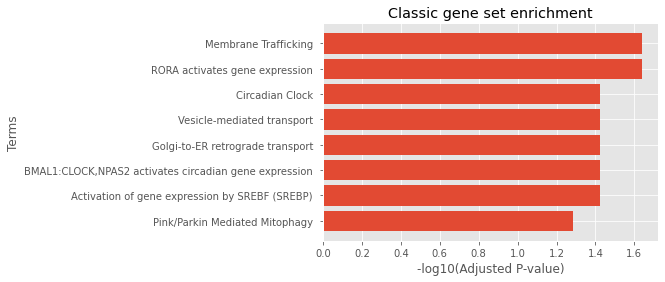

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Term = enr['Term'][:8]
Term = [x.split('Homo')[0] for x in Term]
Pvalues =enr['Adjusted P-value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]
plt.style.use('ggplot')

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('Classic gene set enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/Platelet/classic_enr',format='pdf',bbox_inches='tight')

plt.show()

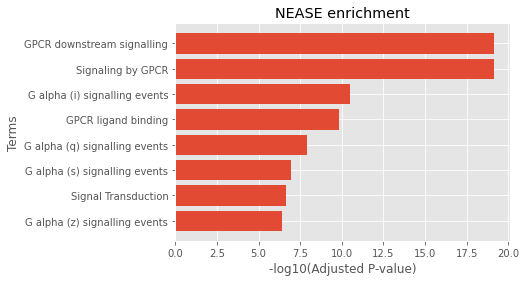

In [15]:
nease_enr=nease_enr.sort_values(by='adj p_value')
Term = nease_enr['Pathway name'][:8]
Pvalues =nease_enr['adj p_value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('NEASE enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/Platelet/nease_enr',format='pdf',bbox_inches='tight')
plt.show()

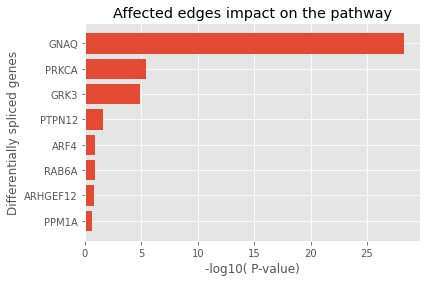

In [16]:

Genes = best_path['Spliced genes']
Pvalues =best_path['p_value']
Pvalues=[ -np.log10(x) for x in Pvalues]


plt.barh(Genes[::-1],Pvalues[::-1] )
plt.title('Affected edges impact on the pathway')
plt.ylabel('Differentially spliced genes')
plt.xlabel('-log10( P-value)')
plt.savefig('AS data/Platelet/Genes.pdf',format='pdf',bbox_inches='tight')
plt.show()